# Implementing Feedforward Neural Networks

**Dataset:** MNIST Dataset **[Loading using TensorFlow]**

Implementing Feedforward neural networks with Keras and TensorFlow for classification of hand-written MNIST dataset using below steps:
1. Import the necessary packages
2. Load the training and testing data
3. Define the network architecture using Keras
4. Train the model using SGD with 11 epochs
5. Evaluate the network
6. Plot the training loss and accuracy

### 1. Import Necessary Packages

We start by importing essential libraries:
- **NumPy:** For handling arrays and data manipulation.
- **TensorFlow and Keras:** To build and train our neural network model.
- **Matplotlib:** For visualizing the training and validation loss and accuracy.
- **`classification_report` from sklearn.metrics:** Provides a detailed evaluation of the model’s performance for each class, displaying metrics like precision, recall, F1-score, and support. This will help us understand how well the model performs for each digit in the MNIST dataset

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### 2. Load the Training and Testing Data

In this step, we load the MNIST dataset using TensorFlow. This dataset contains 60,000 training images and 10,000 test images each of a 28x28 grayscale image of a handwritten digit (0-9).

After loading, we normalize the image pixel values to a range between 0 and 1 to make training faster and more stable.

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

### 3. Define the Network Architecture

Here, we define a simple feedforward neural network using Keras with three layers:
1. **Flatten Layer:** This layer converts each 28x28 image into a one-dimensional vector of 784 values.
2. **Dense Hidden Layer:** Fully connected layer with 128 neurons, activated by ReLU to add non-linearity.
3. **Output Dense Layer:** Contains 10 neurons with softmax activation, representing the 10 possible digit classes (0–9).

In [3]:
# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),      # Flatten the input images
    Dense(128, activation='relu'),      # Hidden layer with ReLU activation
    Dense(10, activation='softmax')     # Output layer with softmax for classification
])

c:\Users\rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 4. Compile and Train the Model

In this step, we compile our model, specifying:
- **Optimizer:** We use Stochastic Gradient Descent (SGD), a simple yet effective optimization algorithm.
- **Loss Function:** Sparse categorical cross-entropy is used, as it works well for multi-class classification tasks.
- **Metrics:** We monitor accuracy during training to evaluate the model's performance.

The model is then trained for 11 epochs on the training data, with validation on the test data.

In [4]:
# Compile the model with SGD optimizer and categorical cross-entropy loss
model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 11 epochs
history = model.fit(x_train, y_train, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7395 - loss: 1.0195 - val_accuracy: 0.9043 - val_loss: 0.3549
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9059 - loss: 0.3428 - val_accuracy: 0.9195 - val_loss: 0.2892
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9169 - loss: 0.2933 - val_accuracy: 0.9275 - val_loss: 0.2612
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9256 - loss: 0.2614 - val_accuracy: 0.9328 - val_loss: 0.2368
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9339 - loss: 0.2371 - val_accuracy: 0.9372 - val_loss: 0.2186
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9386 - loss: 0.2194 - val_accuracy: 0.9416 - val_loss: 0.2040
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9436 - loss: 0.2045 - val_accuracy: 0.9466 - val_loss: 0.1901
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9470 - loss: 0.1886 - 

### 5. Evaluate the Model

Now that the model is trained, we evaluate it on the test data to measure how well it generalizes to unseen images. This gives us the test accuracy and test loss.

In [5]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9476 - loss: 0.1804
Test accuracy: 0.9557


#### Make Predictions and Generate a Classification Report

To provide a detailed evaluation, we’ll generate predictions for the test set and display a classification report. This report shows precision, recall, F1-score, and support for each digit, giving a deeper understanding of the model’s performance on each class.

In [6]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Convert predictions and true labels to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test

# Generate a classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.96      0.94      0.95       982
           5       0.95      0.94      0.95       892
           6       0.95      0.96      0.95       958
           7       0.96      0.95      0.95      1028
           8       0.94      0.95      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### 6. Plot Training Loss and Accuracy

Finally, we visualize the training and validation loss and accuracy over each epoch. These plots help us understand the model’s learning progress and performance consistency across epochs.

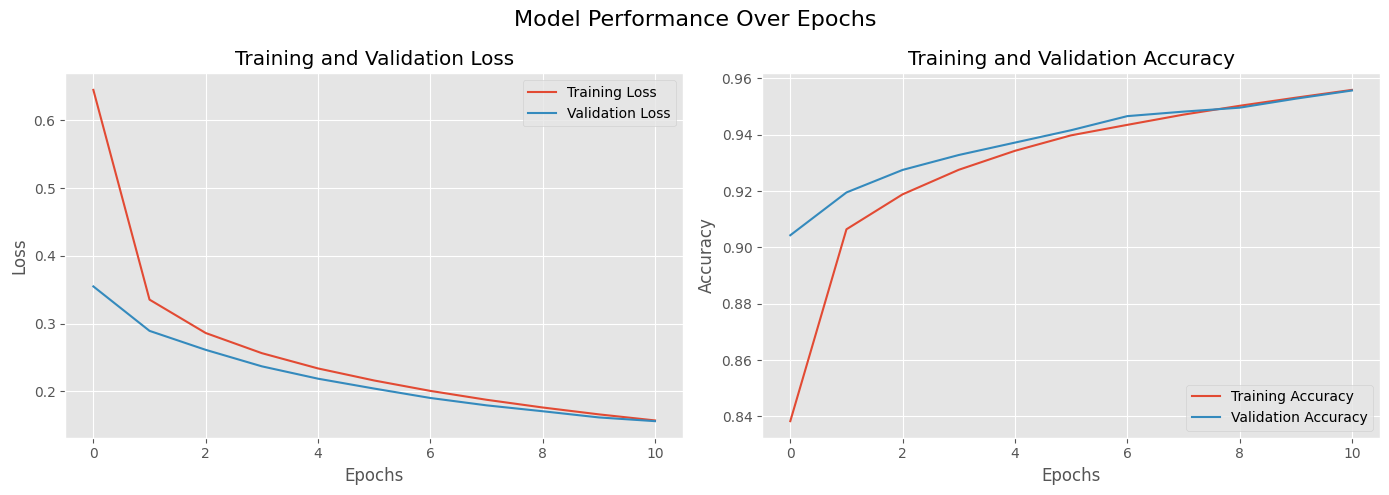

In [7]:
# Plot the training and validation loss and accuracy
plt.style.use("ggplot")  # Use ggplot style for better aesthetics
epochs_range = range(11)  # Number of epochs for x-axis

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
ax1.plot(epochs_range, history.history["loss"], label="Training Loss")
ax1.plot(epochs_range, history.history["val_loss"], label="Validation Loss")
ax1.set_title("Training and Validation Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right")

# Plot Accuracy
ax2.plot(epochs_range, history.history["accuracy"], label="Training Accuracy")
ax2.plot(epochs_range, history.history["val_accuracy"], label="Validation Accuracy")
ax2.set_title("Training and Validation Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower right")

plt.suptitle("Model Performance Over Epochs", fontsize=16)
plt.tight_layout()
plt.show()

#### Visualize Model Prediction on a Single Test Image

To gain insight into the model’s predictions, we’ll visualize a single test image alongside the model's predicted label. This step allows us to manually verify if the predicted label aligns with the content of the image. We use `model.predict()` to get the predicted probabilities for each class and then use `np.argmax()` to identify the class with the highest probability as the predicted label.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


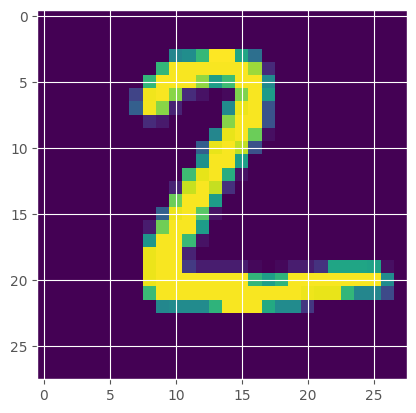

2


In [8]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[1])
plt.show()
print(np.argmax(predicted_value[1], axis=0))